<a href="https://colab.research.google.com/github/vongkhmer/NoteOnEfficientCPP/blob/master/LIP_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#!cp /content/drive/My\ Drive/TrainVal_images.zip .
#!unzip TrainVal_images.zip
#!rm -f TrainVal_images.zip
#!cp /content/drive/My\ Drive/TrainVal_pose_annotations.zip .
#!unzip TrainVal_pose_annotations.zip
#!rm -f TrainVal_pose_annotations.zip


Image at: val_images/485909_196082.jpg
(298, 284, 3)


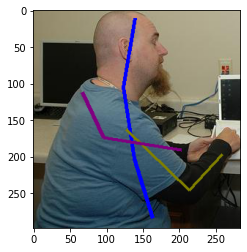

In [268]:
import csv
import sys
import random
import os
from PIL import Image, ImageDraw, ImageOps

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_joint(rec, img_folder):
  img_name = os.path.join(img_folder,rec[0])
  print('Image at: ' + img_name)
  img = Image.open(img_name)
  print(np.array(img).shape)
  draw = ImageDraw.Draw(img)
  r = 5
  bombs = [[0,1],[1,2]
			,[3,4],[4,5]
			,[6,7],[7,8],[8,9]
			,[10,11],[11,12]
			,[13,14], [14,15] ]
  colors = [(255,0,0),(255,0,0),
			  (0,255,0),(0,255,0),
			  (0,0,255),(0,0,255),(0,0,255),
			  (128,128,0),(128,128,0),
			  (128,0,128),(128,0,128)]
  r = 5 
  for b_id in range(len(bombs)):
    b = bombs[b_id]
    color = colors[b_id]
    x1 = rec[ b[0] * 3 + 1]
    y1 = rec[ b[0] * 3 + 2]
    v1 = rec[ b[0] * 3 + 3]
    
    x2 = rec[ b[1] * 3 + 1]
    y2 = rec[ b[1] * 3 + 2]
    v2 = rec[ b[1] * 3 + 3]
    
    if v1 != 'nan' and v2 != 'nan':
      draw.line((int(x1),int(y1), int(x2),int(y2)), fill = color, width = 5)
    elif v1 != 'nan':
      draw.ellipse((int(x1) - r, int(y1) - r, int(x1) + r, int(y1) + r), fill = color)
    elif v2 != 'nan':
      draw.ellipse((int(x2) - r, int(y2) - r, int(x2) + r, int(y2) + r), fill = color)
  plt.imshow(img)

def vis_anno(dataSet):
	csv_path = {
		'train': 'lip_train_set.csv' ,
		'valid': 'lip_val_set.csv',
		'test' :'lip_test_set.csv'
	}
	img_root = {
		'train': 'train_images/',
		'valid': 'val_images/',
		'test': 'notExist/',
	}
	with open(csv_path[dataSet]) as f:
		reader = csv.reader(f)
		recs = []
		for row in reader:
			recs.append(row)
		random_id = random.randint(0, len(recs) - 1)
		plot_joint(recs[random_id], img_root[dataSet])
  
dataSet = 'valid'
vis_anno(dataSet)


In [319]:
train_df = pd.DataFrame({"image_path":[], "joint_vector":[], "joint_valid":[]})
flip_pos = [(0,3), (1,4), (2,5), (10,13), (11,14), (12,15)]
with open("lip_train_set.csv") as f:
  reader = csv.reader(f)
  for row in reader:
    img_fn = os.path.join("train_images", row[0])
    img = Image.open(img_fn)
    width, height = img.size
    img = img.resize((220,220))
    new_path = os.path.join("preprocessed_train", row[0])
    img.save(new_path)
    joint_vector = []
    joint_valid = []
    for i in range(16):
      pos_x = row[3*i + 1]
      pos_y = row[3*i + 2]
      exist = row[3*i + 3]
      if exist != 'nan':
        norm_x = (int(pos_x) - width // 2) / width
        norm_y = (int(pos_y) - height//2 ) / height
        joint_vector.append(norm_x)
        joint_vector.append(norm_y)
        joint_valid.append(1)
        joint_valid.append(1)
      else:
        joint_vector.append(0)
        joint_vector.append(0)
        joint_valid.append(0)
        joint_valid.append(0)

    train_df = train_df.append({"image_path":new_path, "joint_vector":np.array(joint_vector), "joint_valid":np.array(joint_valid)}, ignore_index=True)

    #mirroring
    flip_img = ImageOps.mirror(img)
    new_path = os.path.join("preprocessed_train", "flipped" + row[0])
    flip_img.save(new_path)
    for i in range(16):
      joint_vector[2*i] = - joint_vector[2*i]
    flip_joint_vector = joint_vector.copy()
    flip_joint_valid = joint_valid.copy()
    for fp in flip_pos:
      ind1 = fp[0]
      ind2 = fp[1]
      flip_joint_vector[2 * ind1] = joint_vector[2 * ind2]
      flip_joint_vector[2 * ind1 + 1] = joint_vector[2 * ind2 + 1]

      flip_joint_valid[2 * ind1] = joint_valid[2 * ind2]
      flip_joint_valid[2 * ind1 + 1] = joint_valid[2 * ind2 + 1]

      flip_joint_vector[2 * ind2] = joint_vector[2 * ind1]
      flip_joint_vector[2 * ind2 + 1] = joint_vector[2 * ind1 + 1]

      flip_joint_valid[2 * ind2] = joint_valid[2 * ind1]
      flip_joint_valid[2 * ind2 + 1] = joint_valid[2 * ind1 + 1]

    train_df = train_df.append({"image_path":new_path, "joint_vector":np.array(flip_joint_vector), "joint_valid":np.array(flip_joint_valid)}, ignore_index=True)



KeyboardInterrupt: ignored

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
  File "/usr/lib/python3.6/_weakrefset.py", line 75, in __contains__
    return wr in self.data
KeyboardInterrupt


KeyboardInterrupt: ignored

In [277]:
train_df

,image_path,joint_vector,joint_valid
0,preprocessed_train/1000_1234574.jpg,"[-0.11904761904761904, 0.3521739130434783, -0....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,preprocessed_train/100111_470108.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,preprocessed_train/10012_1730659.jpg,"[0.31683168316831684, 0.40066225165562913, 0.2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,preprocessed_train/10014_189863.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
4,preprocessed_train/100159_1748699.jpg,"[-0.3473684210526316, 0.41694915254237286, -0....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...
378,preprocessed_train/111189_512240.jpg,"[0.0, 0.0, 0.0, 0.0, 0.19753086419753085, 0.41...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, ..."
379,preprocessed_train/111241_468660.jpg,"[0.22509225092250923, 0.12014134275618374, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
380,preprocessed_train/111244_427281.jpg,"[0.16304347826086957, 0.42771084337349397, 0.1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
381,preprocessed_train/111262_1732775.jpg,"[0.0, 0.0, 0.0, 0.0, -0.26296296296296295, 0.3...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, ..."


In [278]:
def plot_nomalized_joint(img_arr, joint_vector, joint_valid):
  img = Image.fromarray(img_arr)
  draw = ImageDraw.Draw(img)
  r = 5
  height, width, _ = img_arr.shape
  bombs = [[0,1],[1,2]
			,[3,4],[4,5]
			,[6,7],[7,8],[8,9]
			,[10,11],[11,12]
			,[13,14],[14,15]]
  colors = [(255,0,0),(255,0,0),
			  (0,255,0),(0,255,0),
			  (0,0,255),(0,0,255),(0,0,255),
			  (128,128,0),(128,128,0),
			  (128,0,128),(128,0,128)]
  r = 5 
  for b_id in range(len(bombs)):
    b = bombs[b_id]
    color = colors[b_id]
    x1 = joint_vector[2 * b[0]]
    x1 = x1 * width + width // 2
    y1 = joint_vector[2 * b[0] + 1]
    y1 = y1 * height + height // 2
    v1 = joint_valid[2 * b[0]]
    
    x2 = joint_vector[2 * b[1]]
    x2 = x2 * width + width //2
    y2 = joint_vector[2 * b[1] + 1]
    y2 = y2 * height + height // 2
    v2 = joint_valid[2 * b[1]]
    
    if v1 != 0 and v2 != 0:
      draw.line((int(x1),int(y1), int(x2),int(y2)), fill = color, width = 5)
      draw.ellipse((int(x1) - r, int(y1) - r, int(x1) + r, int(y1) + r), fill = color)
      draw.ellipse((int(x2) - r, int(y2) - r, int(x2) + r, int(y2) + r), fill = color)
    elif v1 != 0:
      draw.ellipse((int(x1) - r, int(y1) - r, int(x1) + r, int(y1) + r), fill = color)
    elif v2 != 0:
      draw.ellipse((int(x2) - r, int(y2) - r, int(x2) + r, int(y2) + r), fill = color)
  plt.imshow(img)

(32,)


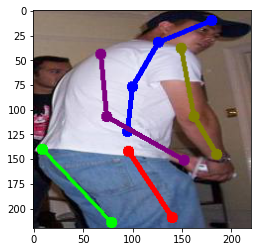

In [331]:
test_index = 23
img = train_df.loc[test_index]["image_path"]
img_arr = np.array(Image.open(img))
joint_vector = train_df.loc[test_index]["joint_vector"]
joint_valid = train_df.loc[test_index]["joint_valid"]
print(joint_vector.shape)
#print(img)
#print(joint_vector)
plot_nomalized_joint(img_arr, joint_vector, joint_valid)